In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
HORI_RES = 180
ASPECT = 2.5 # Height of Character / Width of Character in terminal

def resize(img, hori_res, character_aspect_ratio):
    new_size = (hori_res, int(hori_res / character_aspect_ratio * img.shape[0] / img.shape[1]))
    return cv2.resize(img, new_size)    

def black_white(img):
    return (~np.round(img / 255).astype(bool)).astype(int)



In [3]:
HORI_RES / ASPECT * 1080/1440

54.0

In [4]:
def to_ascii(img):
    with open("shitty_ascii.txt", "w") as f:
        write = "\n".join(["".join([" " if x == 0 else '#' for x in row]) for row in img])
        f.write(write)

def to_text_python_list(img):
    with open("python_list.txt", "w") as f:
        f.write(str(img.tolist()))

def to_text_lisp_list(img):
    with open("lisp_list.txt", "a") as f:
        f.write("'" + str(img.tolist()).replace(", ", " ").replace("[", "(").replace("]", ")") + "\n")

def to_slice_encoding(img):
    output = "'("

    for row_num, row in enumerate(img):
        padded_row = np.pad(row, (1,1), constant_values=0) # detect start and ends of frame
        
        shifted_row = np.roll(padded_row, 1) # shift and XOR to detect block edges 
        xor = np.logical_xor(padded_row,shifted_row)
        xor = xor[1:]

        where = np.where(xor)[0] # extract edge positions

        slices = [(row_num, where[x], where[x+1]) for x in range(0, len(where), 2)]

        for slice in slices:
            if len(slice) > 0:
                output += f"({slice[0]} {slice[1]} {slice[2]}) "

    output = output.strip() + ")\n"

    return output
    



In [5]:
img = cv2.imread(f"bad_apple/image_sequence/bad_apple_{'3413'}.png", cv2.IMREAD_GRAYSCALE)
img = resize(img, HORI_RES, ASPECT)
img = black_white(img)

with open("slice-list.el", "w") as f:
    f.write(to_slice_encoding(img))

# to_text_lisp_list(img)

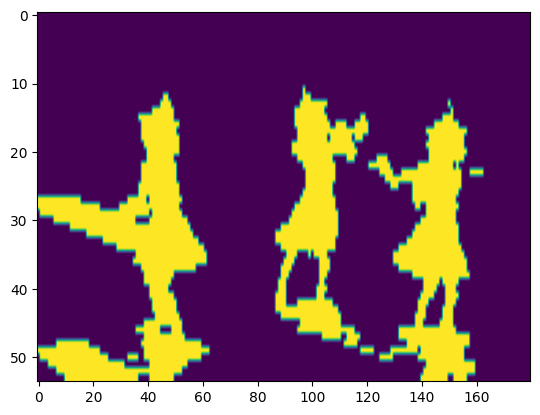

In [16]:
display = np.zeros((54, 180))

for slice in [x[1:].split(" ") for x in to_slice_encoding(img)[2:-3].split(") ")]:
    display[int(slice[0]), int(slice[1]):int(slice[2])] = 1


plt.imshow(display, aspect=2.5)
plt.show()

In [17]:
NUM_FRAMES = 6562
#NUM_FRAMES = 1000

write = ""
for i in range(1, NUM_FRAMES+1, 2):
    str_i = str(i)

    while len(str_i) < 3:
        str_i = "0" + str_i
    
    img = cv2.imread(f"bad_apple/image_sequence/bad_apple_{str_i}.png", cv2.IMREAD_GRAYSCALE)
    img = resize(img, HORI_RES, ASPECT)
    img = black_white(img)

    write += to_slice_encoding(img)


with open("slice-list.el", "w") as f:
    f.write(write)

    # 	    (message "processing time for frame: %.3f | frame-number %s \n" (- (float-time) frame-start-time) frame-number)

In [93]:
import pytesseract
import shutil

In [132]:
def load_preprocess_image(img_file, show = False):
    img = cv2.imread(img_file)
    img = img[-70:, 290:370]

    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    img = cv2.resize(img, (500, 500))

    if show:
        cv2.imwrite("bad_apple_output/test.jpg", img)

    return pytesseract.image_to_string(img, lang='eng', config='--psm 10 --oem 3 -c tessedit_char_whitelist=0123456789')

load_preprocess_image("/Users/owenyi/Desktop/output/img1378.jpg", show=True)


'500\n'

In [140]:

frame_dict = {}
frame_list = []

16259

prev_ocr = None
for i in range(161, 16259):
    print(i)
    ocr = load_preprocess_image(f"/Users/owenyi/Desktop/output/img{i:04}.jpg")

    # if ocr in frame_dict:
    #     frame_dict[ocr].append(i)
    # else:
    #     frame_dict[ocr] = [i]

    if not ocr == prev_ocr:
        frame_list.append(i)
    
    prev_ocr = ocr
    

# print(frame_dict)
print(frame_list)

161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410


In [138]:
frame_list

[161,
 163,
 166,
 169,
 170,
 173,
 176,
 178,
 181,
 184,
 185,
 189,
 191,
 193,
 196,
 199,
 200,
 204,
 206,
 208,
 211,
 215,
 216,
 219,
 221,
 223,
 226,
 230,
 234,
 236,
 238,
 241,
 245,
 249,
 251,
 253,
 256,
 260,
 261,
 264,
 266,
 268,
 271,
 274,
 275,
 279,
 281,
 283,
 285,
 286,
 288,
 289,
 291,
 294,
 297,
 301,
 304,
 306,
 309,
 312,
 313,
 316,
 319,
 321,
 324,
 327,
 328,
 331,
 334,
 336,
 339,
 341,
 343,
 346,
 348,
 350,
 353,
 356,
 358,
 360,
 361,
 363,
 365,
 368,
 371,
 372,
 375,
 378,
 380,
 381,
 383,
 385,
 387,
 390,
 393,
 395,
 398,
 400,
 402,
 405,
 408,
 409,
 411,
 412,
 415,
 417,
 420,
 423,
 424,
 427,
 430,
 432,
 435,
 437,
 439,
 442,
 445,
 447,
 450,
 452,
 454,
 457,
 460,
 462,
 464,
 467,
 469,
 472,
 475,
 476,
 479,
 482,
 484,
 487,
 490,
 491,
 494,
 497,
 499,
 502,
 505,
 507,
 509,
 512,
 514,
 517,
 520,
 521,
 524,
 527,
 529,
 532,
 535,
 537,
 539,
 542,
 544,
 547,
 550,
 552,
 554,
 557,
 559,
 562,
 565,
 566,
 569

In [142]:
counter = 1
for frame in frame_list:
   
    shutil.copy(f"/Users/owenyi/Desktop/output/img{frame:04}.jpg", f"/Users/owenyi/Desktop/filter/{counter:04}.jpg")
    counter+=1


In [ ]:
with open("hello.txt", "w") as f:
    f.write(str(frame_list))